# Содержание:
- Импорт библиотек для анализа данных
- Загрузка тестовой выборки (2009-2018 гг.) из рабочей директории
- Динамика цен закрытия в период тестовой выборки (backtesting)
- Загрузка тестовой выборки из рабочей директории
- Стратегия SMA. Период 12 (рекомендация статьи)
- Стратегия SMA. Период 5
- Стратегия SMA. Период 10
- Технический + фундаментальный анализ: SMA+P/E
- Стратегия Buy and Hold
- Стратегия: stochastic oscillator crossing its own moving average (STOCH-D). Период (15;7)
- Стратегия: stochastic oscillator crossing its own moving average (STOCH-D). Период (5;3)
- Стратегия: stochastic oscillator crossing its own moving average (STOCH-D). Период (10;7)
- Технический + фундаментальный анализ: STOCH-D+P/E
- Проверка устойчивости стратегий на контрольной выборке 2019-2020 гг.
- Стратегия STOCH-D за 25.03.2019-25.03.2020
- Стратегия STOCH-D+pe за 25.03.2019-25.03.2020
- Стратегия SMA+pe за 25.03.2019-25.03.2020
- Расчет ROC
- Стратегия Buy and Hold за 25.03.2019-25.03.2020
- Стратегия AMA за 25.03.2019-25.03.2020

## Импорт библиотек для анализа данных

In [22]:
# Импорт необходтиых библиотек для анализа данных: numpy и pandas для работы с датафреймами, matplotlib.pyplot для визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.parse import urlencode
from urllib.request import urlopen
from datetime import datetime
from datetime import timedelta

## Загрузка тестовой выборки (2009-2018 гг.) из рабочей директории

In [23]:
#Загрузка исторических данных по Газпрому, часовые данные за период 2009-2018
df = pd.read_csv("backtesting.csv",sep=';')    
df.head(15)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,P/E
0,11.01.2009,11:00:00,115.01,115.01,111.77,113.40,8456144,3.601143
1,11.01.2009,12:00:00,113.40,113.90,112.16,113.05,5689917,3.590029
2,11.01.2009,13:00:00,113.07,113.49,112.50,112.72,3299364,3.579549
3,11.01.2009,14:00:00,112.74,113.24,112.50,112.92,2062113,3.585900
4,11.01.2009,15:00:00,112.93,113.04,112.69,112.70,1296101,3.578914
5,11.01.2009,16:00:00,112.70,112.79,111.27,111.97,5471250,3.555732
6,11.01.2009,17:00:00,111.98,111.99,110.61,110.99,5237175,3.524611
7,11.01.2009,18:00:00,110.96,112.39,110.96,111.91,3051181,3.553827
8,11.01.2009,19:00:00,111.91,112.10,111.17,111.58,2905136,3.543347
9,12.01.2009,11:00:00,110.88,113.74,110.75,112.68,7817177,3.578279


## Динамика цен закрытия в период тестовой выборки (backtesting)

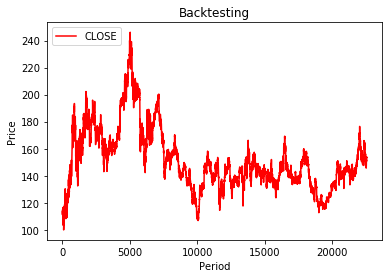

In [24]:
# Код для визуализации динамики цены акции
plt.plot(df['CLOSE'], color='red')
plt.legend(['CLOSE'],loc='upper left')
plt.xlabel('Period')
plt.ylabel('Price')
plt.title('Backtesting')
plt.show()

## Стратегия SMA. Период 12 
(период, использованный в статье)

In [25]:
#Расчет простого скользящего среднего
df['SMA']= df.CLOSE.rolling(window=12).mean() # Период, предложенный в статье
#Так как сделки совершаются по ценам открытия след периода
df['RETURN'] = df['OPEN']/ (df['CLOSE'].shift(-1))-1
#Если сделка в след периоде, то доходность такая
df['RETURN_1'] = df['OPEN'] /(df['CLOSE'].shift(-2))-1
df['RETURN_2']=df['CLOSE']/df['CLOSE'].shift(-1)-1
df.head(10)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,P/E,SMA,RETURN,RETURN_1,RETURN_2
0,11.01.2009,11:00:00,115.01,115.01,111.77,113.40,8456144,3.601143,NaN,0.017337,0.020316,0.003096
1,11.01.2009,12:00:00,113.40,113.90,112.16,113.05,5689917,3.590029,NaN,0.006033,0.004251,0.002928
2,11.01.2009,13:00:00,113.07,113.49,112.50,112.72,3299364,3.579549,NaN,0.001328,0.003283,-0.001771
3,11.01.2009,14:00:00,112.74,113.24,112.50,112.92,2062113,3.585900,NaN,0.000355,0.006877,0.001952
4,11.01.2009,15:00:00,112.93,113.04,112.69,112.70,1296101,3.578914,NaN,0.008574,0.017479,0.006520
5,11.01.2009,16:00:00,112.70,112.79,111.27,111.97,5471250,3.555732,NaN,0.015407,0.007059,0.008830
6,11.01.2009,17:00:00,111.98,111.99,110.61,110.99,5237175,3.524611,NaN,0.000626,0.003585,-0.008221
7,11.01.2009,18:00:00,110.96,112.39,110.96,111.91,3051181,3.553827,NaN,-0.005557,-0.015264,0.002958
8,11.01.2009,19:00:00,111.91,112.10,111.17,111.58,2905136,3.543347,NaN,-0.006834,-0.011745,-0.009762
9,12.01.2009,11:00:00,110.88,113.74,110.75,112.68,7817177,3.578279,NaN,-0.020841,-0.034735,-0.004945


In [27]:
#Перевод значений в строковые величины для упрощения расчетов и расчет длины вектора
close=df['CLOSE'].values
opend=df['OPEN'].values
sma = df['SMA'].values
pe =df['P/E'].values
returns=df['RETURN'].values
return_1=df['RETURN_1'].values
return_2=df['RETURN_2'].values
print(len(sma))

22545


In [30]:
# Сигнал на продажу для расчета доходности по статье
sale_sma = []
for i in range(0, 22545):
    if sma[i] < close[i] and sma[i - 1]>=close[i - 1]:
        if close[i]<= opend[i+1]:
            sale_sma.append(returns[i])
        else:
            sale_sma.append(return_1[i])
#print(sale_sma)

In [31]:
#Сигнал на покупку для расчета по формуле из статьи
cost_sma = []
for i in range(0, 22545):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1]:
        cost_sma.append(-returns[i])
#print(cost_sma)
#print(len(cost_sma))

In [32]:
#Общая стратегия, по которой будем рассчитывать накопленную доходность
profit_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1]:
        profit_sma.append(-returns[i])
    elif (sma[i] < close[i] and sma[i - 1]>=close[i - 1]):
            if close[i]<= opend[i+1]:
                profit_sma.append(returns[i])
            else:
                profit_sma.append(return_1[i])
#print(profit_sma)
#print(len(profit_sma))

Расчет доходности по стратегии SMA нарастающим итогом

In [35]:
#Считаем накопленную доходность нарастающим итогом
sma_profit = []
for i in range(0, len(profit_sma)):
    sma_profit.append(sum(profit_sma[0:i+1]))
sma_profit[-1]

-18.634173202565965

In [36]:
#Накопленная доходность
sum(profit_sma)

-18.634173202565965

График доходности по SMA

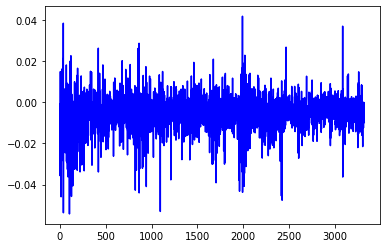

In [39]:
#График доходностей по SMA
plt.plot(profit_sma,color='blue')

Расчет доходности стратегии SMA по формуле из статьи

In [40]:
#Расчет доходности стратегии, %
profitability =(sum(cost_sma)-sum(sale_sma))/sum(cost_sma)
profitability*100

4.600796315011588

## Стратегия SMA. Период 5
Рассмотри скользящую среднюю с меньшим периодом

In [41]:
df = pd.read_csv("backtesting.csv",sep=';')    
#df.head(15)
#Расчет простого скользящего среднего
df['SMA']= df.CLOSE.rolling(window=5).mean() # Период, предложенный в статье
#Так как сделки совершаются по ценам открытия след периода
df['RETURN'] = df['OPEN']/ (df['CLOSE'].shift(-1))-1
#Если сделка в след периоде, то доходность такая
df['RETURN_1'] = df['OPEN'] /(df['CLOSE'].shift(-2))-1
df['RETURN_2']=df['CLOSE']/df['CLOSE'].shift(-1)-1
df.head(10)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,P/E,SMA,RETURN,RETURN_1,RETURN_2
0,11.01.2009,11:00:00,115.01,115.01,111.77,113.40,8456144,3.601143,NaN,0.017337,0.020316,0.003096
1,11.01.2009,12:00:00,113.40,113.90,112.16,113.05,5689917,3.590029,NaN,0.006033,0.004251,0.002928
2,11.01.2009,13:00:00,113.07,113.49,112.50,112.72,3299364,3.579549,NaN,0.001328,0.003283,-0.001771
3,11.01.2009,14:00:00,112.74,113.24,112.50,112.92,2062113,3.585900,NaN,0.000355,0.006877,0.001952
4,11.01.2009,15:00:00,112.93,113.04,112.69,112.70,1296101,3.578914,112.958,0.008574,0.017479,0.006520
5,11.01.2009,16:00:00,112.70,112.79,111.27,111.97,5471250,3.555732,112.672,0.015407,0.007059,0.008830
6,11.01.2009,17:00:00,111.98,111.99,110.61,110.99,5237175,3.524611,112.260,0.000626,0.003585,-0.008221
7,11.01.2009,18:00:00,110.96,112.39,110.96,111.91,3051181,3.553827,112.098,-0.005557,-0.015264,0.002958
8,11.01.2009,19:00:00,111.91,112.10,111.17,111.58,2905136,3.543347,111.830,-0.006834,-0.011745,-0.009762
9,12.01.2009,11:00:00,110.88,113.74,110.75,112.68,7817177,3.578279,111.826,-0.020841,-0.034735,-0.004945


In [42]:
#Перевод значений в строковые величины для упрощения расчетов и расчет длины вектора
close=df['CLOSE'].values
opend=df['OPEN'].values
sma = df['SMA'].values
pe =df['P/E'].values
returns=df['RETURN'].values
return_1=df['RETURN_1'].values
return_2=df['RETURN_2'].values
print(len(sma))

22545


In [43]:
#Общая стратегия, по которой будем рассчитывать накопленную доходность
profit_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1]:
        profit_sma.append(-returns[i])
    elif (sma[i] < close[i] and sma[i - 1]>=close[i - 1]):
            if close[i]<= opend[i+1]:
                profit_sma.append(returns[i])
            else:
                profit_sma.append(return_1[i])
#print(profit_sma)
#print(len(profit_sma))

Расчет доходности по стратегии SMA нарастающим итогом

In [44]:
#Считаем накопленную доходность нарастающим итогом
sma_profit = []
for i in range(0, len(profit_sma)):
    sma_profit.append(sum(profit_sma[0:i+1]))
sma_profit[-1]

-27.30628594101794

График доходности по SMA

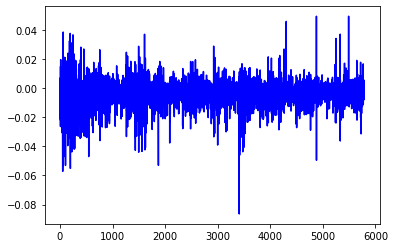

In [45]:
#График распределения доходности по SMA
plt.plot(profit_sma,color='blue')

## Стратегия SMA. Период 10

Увеличим период до 10

In [46]:
df = pd.read_csv("backtesting.csv",sep=';')    
#df.head(15)
#Расчет простого скользящего среднего
df['SMA']= df.CLOSE.rolling(window=10).mean() # Период, предложенный в статье
#Так как сделки совершаются по ценам открытия след периода
df['RETURN'] = df['OPEN']/ (df['CLOSE'].shift(-1))-1
#Если сделка в след периоде, то доходность такая
df['RETURN_1'] = df['OPEN'] /(df['CLOSE'].shift(-2))-1
df['RETURN_2']=df['CLOSE']/df['CLOSE'].shift(-1)-1
df.head(10)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,P/E,SMA,RETURN,RETURN_1,RETURN_2
0,11.01.2009,11:00:00,115.01,115.01,111.77,113.40,8456144,3.601143,NaN,0.017337,0.020316,0.003096
1,11.01.2009,12:00:00,113.40,113.90,112.16,113.05,5689917,3.590029,NaN,0.006033,0.004251,0.002928
2,11.01.2009,13:00:00,113.07,113.49,112.50,112.72,3299364,3.579549,NaN,0.001328,0.003283,-0.001771
3,11.01.2009,14:00:00,112.74,113.24,112.50,112.92,2062113,3.585900,NaN,0.000355,0.006877,0.001952
4,11.01.2009,15:00:00,112.93,113.04,112.69,112.70,1296101,3.578914,NaN,0.008574,0.017479,0.006520
5,11.01.2009,16:00:00,112.70,112.79,111.27,111.97,5471250,3.555732,NaN,0.015407,0.007059,0.008830
6,11.01.2009,17:00:00,111.98,111.99,110.61,110.99,5237175,3.524611,NaN,0.000626,0.003585,-0.008221
7,11.01.2009,18:00:00,110.96,112.39,110.96,111.91,3051181,3.553827,NaN,-0.005557,-0.015264,0.002958
8,11.01.2009,19:00:00,111.91,112.10,111.17,111.58,2905136,3.543347,NaN,-0.006834,-0.011745,-0.009762
9,12.01.2009,11:00:00,110.88,113.74,110.75,112.68,7817177,3.578279,112.392,-0.020841,-0.034735,-0.004945


In [47]:
#Перевод значений в строковые величины для упрощения расчетов и расчет длины вектора
close=df['CLOSE'].values
opend=df['OPEN'].values
sma = df['SMA'].values
pe =df['P/E'].values
returns=df['RETURN'].values
return_1=df['RETURN_1'].values
return_2=df['RETURN_2'].values
print(len(sma))

22545


In [48]:
#Общая стратегия, по которой будем рассчитывать накопленную доходность
profit_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1]:
        profit_sma.append(-returns[i])
    elif (sma[i] < close[i] and sma[i - 1]>=close[i - 1]):
            if close[i]<= opend[i+1]:
                profit_sma.append(returns[i])
            else:
                profit_sma.append(return_1[i])
#print(profit_sma)
#print(len(profit_sma))

Расчет доходности по стратегии SMA нарастающим итогом

In [49]:
#Считаем накопленную доходность нарастающим итогом
sma_profit = []
for i in range(0, len(profit_sma)):
    sma_profit.append(sum(profit_sma[0:i+1]))
sma_profit[-1]

-20.657948628584872

График доходности по SMA

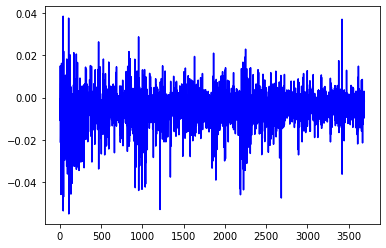

In [50]:
#График распределения доходности по SMA
plt.plot(profit_sma,color='blue')

По графикам видно большее число убыточных сделок у периодов 5 и 10, так как из-за болле короткого периода возникли ложные сигналы на вхождение в сделку. Также накопленная доходность оказалась меньше, чем в предыдущем случае. Следовательно, берем период 12, который также бы признан оптимальным в рассмотренной статье. Кроме того, еще больший период может привести к существенному запаздыванию, пропуску тренда и большим потерям на комиссии.

## Технический + фундаментальный анализ: SMA+P/E
Введем элемент фундаментльного анализа - мультипликатор pe в качестве фильтра для входа в стратегию

In [51]:
df = pd.read_csv("backtesting.csv",sep=';')    
#df.head(15)
#Расчет простого скользящего среднего
df['SMA']= df.CLOSE.rolling(window=12).mean() # Период, предложенный в статье
#Так как сделки совершаются по ценам открытия след периода
df['RETURN'] = df['OPEN']/ (df['CLOSE'].shift(-1))-1
#Если сделка в след периоде, то доходность такая
df['RETURN_1'] = df['OPEN'] /(df['CLOSE'].shift(-2))-1
df['RETURN_2']=df['CLOSE']/df['CLOSE'].shift(-1)-1
close=df['CLOSE'].values
opend=df['OPEN'].values
sma = df['SMA'].values
pe =df['P/E'].values
returns=df['RETURN'].values
return_1=df['RETURN_1'].values
return_2=df['RETURN_2'].values
# Добавляем к стратегии элемент фундаментального анализа (мультипликатор pe)

# Сигнал на продажу для расчета доходности по статье
sale_sma = []
for i in range(0, len(sma)):
    if sma[i] < close[i] and sma[i - 1]>=close[i - 1] and pe[i]>4.6:
        if close[i]<= opend[i+1]:
            sale_sma.append(returns[i])
        else:
            sale_sma.append(return_1[i])
#Сигнал на покупку для расчета по формуле из статьи
cost_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1] and pe[i]<4.6:
        cost_sma.append(-returns[i])
print(cost_sma)
print(len(cost_sma))

[-0.0013339261894174115, -0.0356498194945849, -0.0007256894049347817, -0.016947582885719514, -0.018202502844141044, 0.0067502410800386325, 0.0024163568773233335, -0.0052529720763063725, 0.01334527541424102, -0.009598450158506466, 0.01618039418194328, 0.004756033116082525, -0.004772862865422223, 0.0056093829678735, -0.017057201929703725, 0.00015999999999993797, -0.019715836526181363, -0.004733354370463738, -0.018561671353957365, -0.05370694687682431, -0.02346658035280802, -0.001705871790267599, -0.019334811529933438, -0.006378093375287053, -0.01611785095320628, -0.01985575638856729, 0.00651649235720031, 0.00478656622724416, -0.0074317452867089795, -0.02450941129355222, -0.009144874057436247, -0.01291885345175614, -0.016973338340217747, -0.021396731054977636, 0.0026335040234087836, 0.018198820313623965, -0.02873306535655784, 0.009525284596917705, -0.027056962025316267, -0.004921106077175441, -0.0064771500539761995, -0.0325890599031724, -0.0004452029383394951, -0.03624208304011267, 0.0069

In [52]:
#Общая стратегия, по которой будем рассчитывать накопленную доходность
profit_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1] and pe[i]<4.6:
        profit_sma.append(-returns[i])
    elif (sma[i] < close[i] and sma[i - 1]>=close[i - 1] and pe[i]>4.6):
            if close[i]<= opend[i+1]:
                profit_sma.append(returns[i])
            else:
                profit_sma.append(return_1[i])
#print(profit_sma)
#print(len(profit_sma))

Накопленная доходность нарастающим итогом

In [53]:
#Считаем накопленную доходность нарастающим итогом
sma_profit = []
for i in range(0, len(profit_sma)):
    sma_profit.append(sum(profit_sma[0:i+1]))
sma_profit[-1]

-8.909517793273189

График доходности для SMA

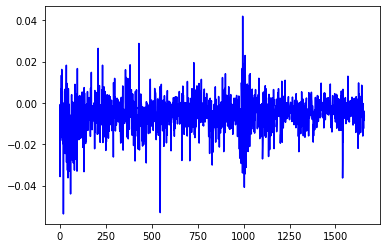

In [54]:
#График доходности для SMA
plt.plot(profit_sma, color='blue')

Как можно видеть, удалось избежать наиболее убыточных сделок

Расчет доходности стратегии по формуле из статьи

In [55]:
#Расчет доходности стратегии, %
profitability =(sum(cost_sma)-sum(sale_sma))/sum(cost_sma)
profitability*100 

38.58731401641736

Доходность комбинированной стратегии существенно возрасла, следовательно, она будет использована далее. 

# Стратегия Buy and Hold

Вывод доходности, %

In [58]:
#(Buy and hold) Вывод доходность стратегии нарастающим итогом
df = pd.read_csv("backtesting.csv",sep=';')  #Загрузка исторических данных по Газпрому, часовые данные за период 2009-2018
buynhold = []
for i in range(0, len(return_2)):
    buynhold.append(sum(return_2[0:i+1]))
print((buynhold[-2])*100)

12.546323899419276


График доходности стратегии Buy and Hold

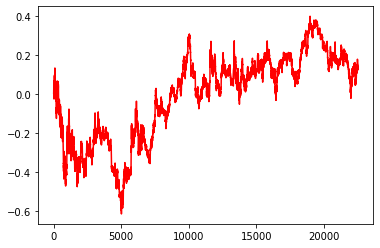

In [59]:
plt.plot(buynhold, color='red')

Так как доходноть (12,5%) меньше доходности стратегий SMA и STOCH-D (см. ниже), далее в анализе Buy and Hold присутствовать не будет

# Стратегия: stochastic oscillator crossing its own moving average (STOCH-D). Период (15;7)
Данная стратегия основана на 2-х условиях: пересечение основной и сигнальной линий + нахождение 
в зоне перекупленности/перепроданности

In [68]:
# Стратегия: stochastic oscillator crossing its own moving average(STOCH-D)

#Загрузка исторических данных по Газпрому, часовые данные за период 2009-2018
df = pd.read_csv("backtesting.csv",sep=';')    

# Вводим столбец с расчетом доходностей

df['Return'] = df['CLOSE'] / df['CLOSE'].shift()-1

# Создаем новые столбцы для расчета показателей индикатора.
# Вводим переменную "LL" 

df['LL'] = df['LOW'].rolling(window=15).min()

# Вводим переменную "HH"

df['HH'] = df['HIGH'].rolling(window=15).max()

# Вводим переменную "%K" 

df['%K'] = 100*((df['CLOSE'] - df['LL']) / (df['HH'] - df['LL']))

# Вводим переменную %D"
df['%D'] = df['%K'].rolling(window=7).mean()

# Определяем сигналы для входа в позицию

# Buy, когда линия %K пересекает линию %D снизу вверх, и значение осциллятора ниже 20

df['Buy'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] <= 20)

# Sell, когда линия %K пересекает линию %D сверху вниз и значение осциллятора выше 80.

df['Sell'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] >= 80)

# Вводим столбец Sign для отражения входа в сделку

df['%K'] = df['%K'].fillna(0)
df['%D'] = df['%D'].fillna(0)
df['Sign'] = 0
df.loc[df['Buy'],'Sign'] = 1 
df.loc[df['Sell'],'Sign'] = -1

# Расчитываем доходность стратегии

df['st_return'] = df['Return'] * df['Sign']
df['st_return'] = df['st_return'].fillna(0)

df.head(20)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,P/E,Return,LL,HH,%K,%D,Buy,Sell,Sign,st_return
0,11.01.2009,11:00:00,115.01,115.01,111.77,113.40,8456144,3.601143,NaN,NaN,NaN,0.000000,0.0,False,False,0,0.0
1,11.01.2009,12:00:00,113.40,113.90,112.16,113.05,5689917,3.590029,-0.003086,NaN,NaN,0.000000,0.0,False,False,0,-0.0
2,11.01.2009,13:00:00,113.07,113.49,112.50,112.72,3299364,3.579549,-0.002919,NaN,NaN,0.000000,0.0,False,False,0,-0.0
3,11.01.2009,14:00:00,112.74,113.24,112.50,112.92,2062113,3.585900,0.001774,NaN,NaN,0.000000,0.0,False,False,0,0.0
4,11.01.2009,15:00:00,112.93,113.04,112.69,112.70,1296101,3.578914,-0.001948,NaN,NaN,0.000000,0.0,False,False,0,-0.0
5,11.01.2009,16:00:00,112.70,112.79,111.27,111.97,5471250,3.555732,-0.006477,NaN,NaN,0.000000,0.0,False,False,0,-0.0
6,11.01.2009,17:00:00,111.98,111.99,110.61,110.99,5237175,3.524611,-0.008752,NaN,NaN,0.000000,0.0,False,False,0,-0.0
7,11.01.2009,18:00:00,110.96,112.39,110.96,111.91,3051181,3.553827,0.008289,NaN,NaN,0.000000,0.0,False,False,0,0.0
8,11.01.2009,19:00:00,111.91,112.10,111.17,111.58,2905136,3.543347,-0.002949,NaN,NaN,0.000000,0.0,False,False,0,-0.0
9,12.01.2009,11:00:00,110.88,113.74,110.75,112.68,7817177,3.578279,0.009858,NaN,NaN,0.000000,0.0,False,False,0,0.0


Расчет доходности по стратегии (STOCH-D), %

In [69]:
# Расчет средней годовой доходности по стратегии (STOCH-D), %

st=[]
for i in range(0, len(df['st_return'])):
    st.append(sum(df['st_return'][0:i+1]))
x=st[-1]
y=100*x/11
y

50.55261564755418

График распределения доходностей во времени

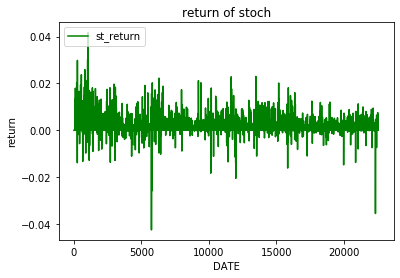

In [70]:
plt.plot(df.st_return, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('return')
plt.title('return of stoch')
plt.show()

График накопленной доходности

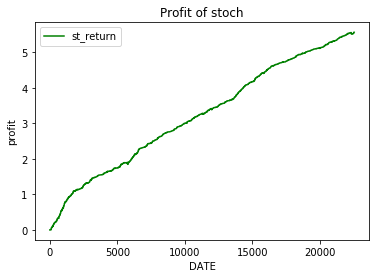

In [71]:
# Накопленная доходность
plt.plot(st, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('profit')
plt.title('Profit of stoch')
plt.show()

## Стратегия: stochastic oscillator crossing its own moving average (STOCH-D). Период (5;3)
Базовый вариант

In [7]:
# Стратегия: stochastic oscillator crossing its own moving average(STOCH-D)

#Загрузка исторических данных по Газпрому, часовые данные за период 2009-2019
df = pd.read_csv("backtesting.csv",sep=';')    

# Вводим столбец с расчетом доходностей

df['Return'] = df['CLOSE'] / df['CLOSE'].shift()-1

# Создаем новые столбцы для расчета показателей индикатора.
# Вводим переменную "LL" 

df['LL'] = df['LOW'].rolling(window=5).min()

# Вводим переменную "HH"

df['HH'] = df['HIGH'].rolling(window=5).max()

# Вводим переменную "%K" 

df['%K'] = 100*((df['CLOSE'] - df['LL']) / (df['HH'] - df['LL']))

# Вводим переменную %D"
df['%D'] = df['%K'].rolling(window=3).mean()

# Определяем сигналы для входа в позицию

# Buy, когда линия %K пересекает линию %D снизу вверх, и значение осциллятора ниже 20

df['Buy'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] <= 20)

# Sell, когда линия %K пересекает линию %D сверху вниз и значение осциллятора выше 80.

df['Sell'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] >= 80)

# Вводим столбец Sign для отражения входа в сделку

df['%K'] = df['%K'].fillna(0)
df['%D'] = df['%D'].fillna(0)
df['Sign'] = 0
df.loc[df['Buy'],'Sign'] = 1 
df.loc[df['Sell'],'Sign'] = -1

# Расчитываем доходность стратегии

df['st_return'] = df['Return'] * df['Sign']
df['st_return'] = df['st_return'].fillna(0)

Расчет доходности по стратегии (STOCH-D), %

In [8]:
# Расчет средней годовой доходности по стратегии (STOCH-D), %

st=[]
for i in range(0, len(df['st_return'])):
    st.append(sum(df['st_return'][0:i+1]))
x=st[-1]
y=100*x/11
y

4.297100884012064

График распределения доходностей во времени

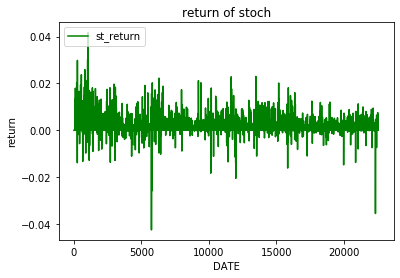

In [62]:
plt.plot(df.st_return, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('return')
plt.title('return of stoch')
plt.show()

График накопленной доходности

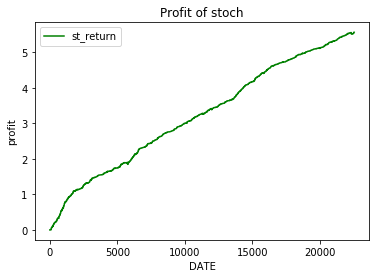

In [63]:
# Накопленная доходность
plt.plot(st, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('profit')
plt.title('Profit of stoch')
plt.show()

Более короткий период (5;3) приводит к большему числу ложных сделок (больше пересечений линий %K и %D) из-за чего доходность стратегии более низкая. Действительно, на графике распределения доходностей отрицательных значений больше, чем в предыдущем случае, также накопленная доходность неустойчивей. Следовательно, необходимо увеличить период.

## Стратегия: stochastic oscillator crossing its own moving average (STOCH-D). Период (10;7)

In [64]:
# Стратегия: stochastic oscillator crossing its own moving average(STOCH-D)

#Загрузка исторических данных по Газпрому, часовые данные за период 2009-2019
df = pd.read_csv("backtesting.csv",sep=';')    

# Вводим столбец с расчетом доходностей

df['Return'] = df['CLOSE'] / df['CLOSE'].shift()-1

# Создаем новые столбцы для расчета показателей индикатора.
# Вводим переменную "LL" 

df['LL'] = df['LOW'].rolling(window=10).min()

# Вводим переменную "HH"

df['HH'] = df['HIGH'].rolling(window=10).max()

# Вводим переменную "%K" 

df['%K'] = 100*((df['CLOSE'] - df['LL']) / (df['HH'] - df['LL']))

# Вводим переменную %D"
df['%D'] = df['%K'].rolling(window=7).mean()

# Определяем сигналы для входа в позицию

# Buy, когда линия %K пересекает линию %D снизу вверх, и значение осциллятора ниже 20

df['Buy'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] <= 20)

# Sell, когда линия %K пересекает линию %D сверху вниз и значение осциллятора выше 80.

df['Sell'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] >= 80)

# Вводим столбец Sign для отражения входа в сделку

df['%K'] = df['%K'].fillna(0)
df['%D'] = df['%D'].fillna(0)
df['Sign'] = 0
df.loc[df['Buy'],'Sign'] = 1 
df.loc[df['Sell'],'Sign'] = -1

# Расчитываем доходность стратегии

df['st_return'] = df['Return'] * df['Sign']
df['st_return'] = df['st_return'].fillna(0)

Расчет доходности по стратегии (STOCH-D), %

In [65]:
# Расчет средней годовой доходности по стратегии (STOCH-D), %

st=[]
for i in range(0, len(df['st_return'])):
    st.append(sum(df['st_return'][0:i+1]))
x=st[-1]
y=100*x/11
y

40.155203898115936

График распределения доходностей во времени

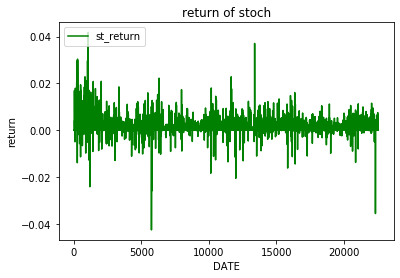

In [66]:
plt.plot(df.st_return, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('return')
plt.title('return of stoch')
plt.show()

График накопленной доходности

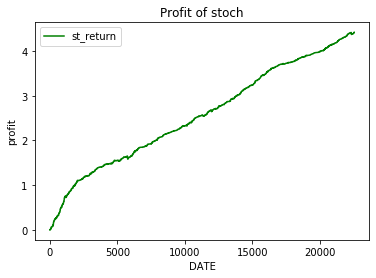

In [67]:
# Накопленная доходность
plt.plot(st, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('profit')
plt.title('Profit of stoch')
plt.show()

Доходность периода (10;7) выше чем (5;3), но ниже изначального варианта (15,7), т.е. чем больше период тем меньше ложных сигналов. Однако увеличение периода еще сильнее может привести к потере части понтенциальной прибыли из-за поздних сигналов. Следовательно, далее работаем с периодом (15,7)

## Технический + фундаментальный анализ: STOCH-D+P/E
Введем элемент фундаментльного анализа - мультипликатор pe в качестве фильтра для входа в стратегию

In [72]:
# Добавляем к техническому аналмзу фундаментальный (мультипликатор pe)

#Загрузка исторических данных по Газпрому, часовые данные за период 2009-2018
df = pd.read_csv("backtesting.csv",sep=';')  

# Вводим столбец с расчетом доходностей

df['Return'] = df['CLOSE'] / df['CLOSE'].shift()-1

# Создаем новые столбцы для расчета показателей индикатора.
# Вводим переменную "LL" 

df['LL'] = df['LOW'].rolling(window=15).min()

# Вводим переменную "HH"

df['HH'] = df['HIGH'].rolling(window=15).max()

# Вводим переменную "%K" 

df['%K'] = 100*((df['CLOSE'] - df['LL']) / (df['HH'] - df['LL']))

# Вводим переменную %D"
df['%D'] = df['%K'].rolling(window=7).mean()

# Определяем сигналы для входа в позицию

# Buy, когда линия %K пересекает линию %D снизу вверх, и значение осциллятора ниже 20, и значение pe ниже среднеотраслевого (4,6)

df['Buy'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] <= 20) & (df['P/E'] < 4.6)

# Sell, когда линия %K пересекает линию %D сверху вниз и значение осциллятора выше 80.

df['Sell'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] >= 80)

# Вводим столбец Sign для отражения входа в сделку

df['%K'] = df['%K'].fillna(0)
df['%D'] = df['%D'].fillna(0)
df['Sign'] = 0
df.loc[df['Buy'],'Sign'] = 1 
df.loc[df['Sell'],'Sign'] = -1

# Расчитываем доходность стратегии

df['st_return'] = df['Return'] * df['Sign']
df['st_return'] = df['st_return'].fillna(0)

df.head(20)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,P/E,Return,LL,HH,%K,%D,Buy,Sell,Sign,st_return
0,11.01.2009,11:00:00,115.01,115.01,111.77,113.40,8456144,3.601143,NaN,NaN,NaN,0.000000,0.0,False,False,0,0.0
1,11.01.2009,12:00:00,113.40,113.90,112.16,113.05,5689917,3.590029,-0.003086,NaN,NaN,0.000000,0.0,False,False,0,-0.0
2,11.01.2009,13:00:00,113.07,113.49,112.50,112.72,3299364,3.579549,-0.002919,NaN,NaN,0.000000,0.0,False,False,0,-0.0
3,11.01.2009,14:00:00,112.74,113.24,112.50,112.92,2062113,3.585900,0.001774,NaN,NaN,0.000000,0.0,False,False,0,0.0
4,11.01.2009,15:00:00,112.93,113.04,112.69,112.70,1296101,3.578914,-0.001948,NaN,NaN,0.000000,0.0,False,False,0,-0.0
5,11.01.2009,16:00:00,112.70,112.79,111.27,111.97,5471250,3.555732,-0.006477,NaN,NaN,0.000000,0.0,False,False,0,-0.0
6,11.01.2009,17:00:00,111.98,111.99,110.61,110.99,5237175,3.524611,-0.008752,NaN,NaN,0.000000,0.0,False,False,0,-0.0
7,11.01.2009,18:00:00,110.96,112.39,110.96,111.91,3051181,3.553827,0.008289,NaN,NaN,0.000000,0.0,False,False,0,0.0
8,11.01.2009,19:00:00,111.91,112.10,111.17,111.58,2905136,3.543347,-0.002949,NaN,NaN,0.000000,0.0,False,False,0,-0.0
9,12.01.2009,11:00:00,110.88,113.74,110.75,112.68,7817177,3.578279,0.009858,NaN,NaN,0.000000,0.0,False,False,0,0.0


Расчет доходности по стратегии (STOCH-D), %

In [73]:
# Расчет средней годовой доходности по стратегии (STOCH-D), %

st=[]
for i in range(0, len(df['st_return'])):
    st.append(sum(df['st_return'][0:i+1]))
x=st[-1]
y=100*x/11
y

39.48341136019165

График распределения доходностей во времени

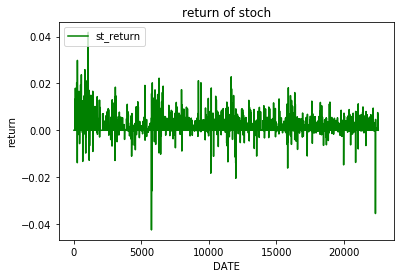

In [74]:
plt.plot(df.st_return, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('return')
plt.title('return of stoch')
plt.show()

График накопленной доходности

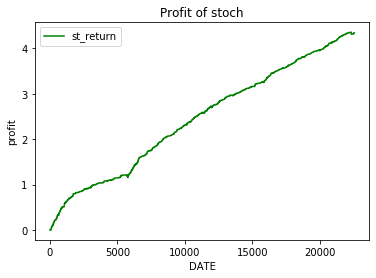

In [75]:
plt.plot(st, color='green')
plt.legend(['st_return'],loc='upper left')
plt.xlabel('DATE')
plt.ylabel('profit')
plt.title('Profit of stoch')
plt.show()

Доходность стратегии с периодом (15;7) снизилась, но не сущетсвенно. Данная стратегия добавляет консервативности в портфель благодаря фильтру pe, но продолжает обеспечивать высокую доходность.

# Проверка устойчивости стратегий
на контрольной выборке 2019-2020 гг.

Проверим устойчивость стратегии SMA+pe и STOCH-D+pe на данных за предшествующий год (25.03.2019-25.03.2020). 
А также рассмотрим модификацию стратегии SMA

In [76]:
# Подключение к брокеру для получения исторических цен, часовые данные (25.03.2019-25.03.2020). В данноми примере расмотрена Финам. 

from urllib.parse import urlencode
from urllib.request import urlopen
from datetime import datetime
from datetime import timedelta

ticker="GAZP" 
period=7 # 'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10
start='25.03.2019'
end='25.03.2020'

periods={'tick': 1, 'min': 2, '5min': 3, '10min': 4, '15min': 5, '30min': 6, 'hour': 7, 'daily': 8, 'week': 9, 'month': 10}
print ("ticker="+ticker+"; period="+str(period)+"; start="+start+"; end="+end)

#цифровой код акции
tickers={'ABRD':82460,'AESL':181867,'AFKS':19715,'AFLT':29,'AGRO':399716,'AKRN':17564,'ALBK':82616,'ALNU':81882,'ALRS':81820,'AMEZ':20702,'APTK':13855,'AQUA':35238,'ARMD':19676,'ARSA':19915,'ASSB':16452,'AVAN':82843,'AVAZ':39,'AVAZP':40,'BANE':81757,'BANEP':81758,'BGDE':175840,'BISV':35242,'BISVP':35243,'BLNG':21078,'BRZL':81901,'BSPB':20066,'CBOM':420694,'CHEP':20999,'CHGZ':81933,'CHKZ':21000,'CHMF':16136,'CHMK':21001,'CHZN':19960,'CLSB':16712,'CLSBP':16713,'CNTL':21002,'CNTLP':81575,'DASB':16825,'DGBZ':17919,'DIOD':35363,'DIXY':18564,'DVEC':19724,'DZRD':74744,'DZRDP':74745,'ELTZ':81934,'ENRU':16440,'EPLN':451471,'ERCO':81935,'FEES':20509,'FESH':20708,'FORTP':82164,'GAZA':81997,'GAZAP':81998,'GAZC':81398,'GAZP':16842,'GAZS':81399,'GAZT':82115,'GCHE':20125,'GMKN':795,'GRAZ':16610,'GRNT':449114,'GTLC':152876,'GTPR':175842,'GTSS':436120,'HALS':17698,'HIMC':81939,'HIMCP':81940,'HYDR':20266,'IDJT':388276,'IDVP':409486,'IGST':81885,'IGST03':81886,'IGSTP':81887,'IRAO':20516,'IRGZ':9,'IRKT':15547,'ISKJ':17137,'JNOS':15722,'JNOSP':15723,'KAZT':81941,'KAZTP':81942,'KBSB':19916,'KBTK':35285,'KCHE':20030,'KCHEP':20498,'KGKC':83261,'KGKCP':152350,'KLSB':16329,'KMAZ':15544,'KMEZ':22525,'KMTZ':81903,'KOGK':20710,'KRKN':81891,'KRKNP':81892,'KRKO':81905,'KRKOP':81906,'KROT':510,'KROTP':511,'KRSB':20912,'KRSBP':20913,'KRSG':15518,'KSGR':75094,'KTSB':16284,'KTSBP':16285,'KUBE':522,'KUNF':81943,'KUZB':83165,'KZMS':17359,'KZOS':81856,'KZOSP':81857,'LIFE':74584,'LKOH':8,'LNTA':385792,'LNZL':21004,'LNZLP':22094,'LPSB':16276,'LSNG':31,'LSNGP':542,'LSRG':19736,'LVHK':152517,'MAGE':74562,'MAGEP':74563,'MAGN':16782,'MERF':20947,'MFGS':30,'MFGSP':51,'MFON':152516,'MGNT':17086,'MGNZ':20892,'MGTS':12984,'MGTSP':12983,'MGVM':81829,'MISB':16330,'MISBP':16331,'MNFD':80390,'MOBB':82890,'MOEX':152798,'MORI':81944,'MOTZ':21116,'MRKC':20235,'MRKK':20412,'MRKP':20107,'MRKS':20346,'MRKU':20402,'MRKV':20286,'MRKY':20681,'MRKZ':20309,'MRSB':16359,'MSNG':6,'MSRS':16917,'MSST':152676,'MSTT':74549,'MTLR':21018,'MTLRP':80745,'MTSS':15523,'MUGS':81945,'MUGSP':81946,'MVID':19737,'NAUK':81992,'NFAZ':81287,'NKHP':450432,'NKNC':20100,'NKNCP':20101,'NKSH':81947,'NLMK':17046,'NMTP':19629,'NNSB':16615,'NNSBP':16616,'NPOF':81858,'NSVZ':81929,'NVTK':17370,'ODVA':20737,'OFCB':80728,'OGKB':18684,'OMSH':22891,'OMZZP':15844,'OPIN':20711,'OSMP':21006,'OTCP':407627,'PAZA':81896,'PHOR':81114,'PHST':19717,'PIKK':18654,'PLSM':81241,'PLZL':17123,'PMSB':16908,'PMSBP':16909,'POLY':175924,'PRFN':83121,'PRIM':17850,'PRIN':22806,'PRMB':80818,'PRTK':35247,'PSBR':152320,'QIWI':181610,'RASP':17713,'RBCM':74779,'RDRB':181755,'RGSS':181934,'RKKE':20321,'RLMN':152677,'RLMNP':388313,'RNAV':66644,'RODNP':66693,'ROLO':181316,'ROSB':16866,'ROSN':17273,'ROST':20637,'RSTI':20971,'RSTIP':20972,'RTGZ':152397,'RTKM':7,'RTKMP':15,'RTSB':16783,'RTSBP':16784,'RUAL':414279,'RUALR':74718,'RUGR':66893,'RUSI':81786,'RUSP':20712,'RZSB':16455,'SAGO':445,'SAGOP':70,'SARE':11,'SAREP':24,'SBER':3,'SBERP':23,'SELG':81360,'SELGP':82610,'SELL':21166,'SIBG':436091,'SIBN':2,'SKYC':83122,'SNGS':4,'SNGSP':13,'STSB':20087,'STSBP':20088,'SVAV':16080,'SYNG':19651,'SZPR':22401,'TAER':80593,'TANL':81914,'TANLP':81915,'TASB':16265,'TASBP':16266,'TATN':825,'TATNP':826,'TGKA':18382,'TGKB':17597,'TGKBP':18189,'TGKD':18310,'TGKDP':18391,'TGKN':18176,'TGKO':81899,'TNSE':420644,'TORS':16797,'TORSP':16798,'TRCN':74561,'TRMK':18441,'TRNFP':1012,'TTLK':18371,'TUCH':74746,'TUZA':20716,'UCSS':175781,'UKUZ':20717,'UNAC':22843,'UNKL':82493,'UPRO':18584,'URFD':75124,'URKA':19623,'URKZ':82611,'USBN':81953,'UTAR':15522,'UTII':81040,'UTSY':419504,'UWGN':414560,'VDSB':16352,'VGSB':16456,'VGSBP':16457,'VJGZ':81954,'VJGZP':81955,'VLHZ':17257,'VRAO':20958,'VRAOP':20959,'VRSB':16546,'VRSBP':16547,'VSMO':15965,'VSYD':83251,'VSYDP':83252,'VTBR':19043,'VTGK':19632,'VTRS':82886,'VZRZ':17068,'VZRZP':17067,'WTCM':19095,'WTCMP':19096,'YAKG':81917,'YKEN':81766,'YKENP':81769,'YNDX':388383,'YRSB':16342,'YRSBP':16343,'ZHIV':181674,'ZILL':81918,'ZMZN':556,'ZMZNP':603,'ZVEZ':82001}
FINAM_URL = "http://export.finam.ru/"
market = 0 

start_date = datetime.strptime(start, "%d.%m.%Y").date()
start_date_rev=datetime.strptime(start, '%d.%m.%Y').strftime('%Y%m%d')
end_date = datetime.strptime(end, "%d.%m.%Y").date()
end_date_rev=datetime.strptime(end, '%d.%m.%Y').strftime('%Y%m%d')

params = urlencode([
					('market', market), #на каком рынке торгуется бумага
					('em', tickers[ticker]), #цифровой символ, который соответствует бумаге.
					('code', ticker), #тикер акции
					('apply',0), 
					('df', start_date.day), #Начальная дата, номер дня (1-31)
					('mf', start_date.month - 1), #Начальная дата, номер месяца (0-11)
					('yf', start_date.year), #Начальная дата, год
					('from', start_date), #Начальная дата полностью
					('dt', end_date.day), #Конечная дата, номер дня	
					('mt', end_date.month - 1), #Конечная дата, номер месяца
					('yt', end_date.year), #Конечная дата, год
					('to', end_date), #Конечная дата
					('p', period), #Таймфрейм
					('f', ticker+"_" + start_date_rev + "_" + end_date_rev), #Имя файла
					('e', ".csv"), #Расширение сформированного файла
					('cn', ticker), #тикер акции	
					('dtf', 1), #В каком формате брать даты. Выбор из 5 возможных. См. страницу https://www.finam.ru/profile/moex-akcii/sberbank/export/
					('tmf', 1), #В каком формате брать время. Выбор из 4 возможных.
					('MSOR', 0), #Время свечи (0 - open; 1 - close)	
					('mstime', "on"), #Московское время	
					('mstimever', 1), #Коррекция часового пояса	
					('sep', 1), #Разделитель полей	(1 - запятая, 2 - точка, 3 - точка с запятой, 4 - табуляция, 5 - пробел)
					('sep2', 1), #Разделитель разрядов
					('datf', 1), #Формат записи в файл. Выбор из 6 возможных.
					('at', 1)]) #Нужны ли заголовки столбцов
url = FINAM_URL + ticker+"_" + start_date_rev + "_" + end_date_rev + ".csv?" + params 
print("Ссылка на скачивание "+url)
txt=urlopen(url).readlines() 
local_file = open('GAZP.txt', "w") #задаём файл, в который запишем котировки.
for line in txt:  
	local_file.write(line.strip().decode( "utf-8" )+'\n')	
local_file.close()
print("Файл находится в рабочей директории")

ticker=GAZP; period=7; start=25.03.2019; end=25.03.2020
Ссылка на скачивание http://export.finam.ru/GAZP_20190325_20200325.csv?market=0&em=16842&code=GAZP&apply=0&df=25&mf=2&yf=2019&from=2019-03-25&dt=25&mt=2&yt=2020&to=2020-03-25&p=7&f=GAZP_20190325_20200325&e=.csv&cn=GAZP&dtf=1&tmf=1&MSOR=0&mstime=on&mstimever=1&sep=1&sep2=1&datf=1&at=1
Файл находится в рабочей директории


# Стратегия STOCH-D за 25.03.2019-25.03.2020

In [77]:
df1=pd.read_csv("GAZP.txt", sep=',')    
df1.head(15)

# Проверяем устойчивость стратегии на выборке последнего года. STOCH-D

df1['<Return>'] = df1['<CLOSE>'] / df1['<CLOSE>'].shift()-1

# Создаем новые столбцы для расчета показателей индикатора.
# Вводим переменную "LL" 

df1['<LL>'] = df1['<LOW>'].rolling(window=15).min()

# Вводим переменную "HH"

df1['<HH>'] = df1['<HIGH>'].rolling(window=15).max()

# Вводим переменную "%K" 

df1['<%K>'] = 100*((df1['<CLOSE>'] - df1['<LL>']) / (df1['<HH>'] - df1['<LL>']))

# Вводим переменную %D"
df1['<%D>'] = df1['<%K>'].rolling(window=7).mean()

# Определяем сигналы для входа в позицию

# Buy, когда линия %K пересекает линию %D снизу вверх, и значение осциллятора ниже 20

df1['<Buy>'] = ((df1['<%K>'] > df1['<%D>']) & (df1['<%K>'].shift(1) < df1['<%D>'].shift(1))) & (df1['<%D>'] <= 20)

# Sell, когда линия %K пересекает линию %D сверху вниз и значение осциллятора выше 80.

df1['<Sell>'] = ((df1['<%K>'] < df1['<%D>']) & (df1['<%K>'].shift(1) > df1['<%D>'].shift(1))) & (df1['<%D>'] >= 80)

# Вводим столбец Sign для отражения входа в сделку

df1['<%K>'] = df1['<%K>'].fillna(0)
df1['<%D>'] = df1['<%D>'].fillna(0)
df1['<Sign>'] = 0
df1.loc[df1['<Buy>'],'<Sign>'] = 1 
df1.loc[df1['<Sell>'],'<Sign>'] = -1

# Расчитываем дохожность стратегии

df1['<st_return>'] = df1['<Return>'] * df1['<Sign>']
df1['<st_return>'] = df1['<st_return>'].fillna(0)

df1.head(10)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<Return>,<LL>,<HH>,<%K>,<%D>,<Buy>,<Sell>,<Sign>,<st_return>
0,GAZP,60,20190325,100000,151.22,151.67,150.72,151.17,3648090,NaN,NaN,NaN,0.0,0.0,False,False,0,0.0
1,GAZP,60,20190325,110000,151.17,151.85,151.10,151.57,2408670,0.002646,NaN,NaN,0.0,0.0,False,False,0,0.0
2,GAZP,60,20190325,120000,151.60,152.06,151.37,151.54,3582890,-0.000198,NaN,NaN,0.0,0.0,False,False,0,-0.0
3,GAZP,60,20190325,130000,151.55,152.10,151.50,151.82,1343490,0.001848,NaN,NaN,0.0,0.0,False,False,0,0.0
4,GAZP,60,20190325,140000,151.83,151.88,151.41,151.43,1139580,-0.002569,NaN,NaN,0.0,0.0,False,False,0,-0.0
5,GAZP,60,20190325,150000,151.42,151.78,151.37,151.67,1157500,0.001585,NaN,NaN,0.0,0.0,False,False,0,0.0
6,GAZP,60,20190325,160000,151.66,152.05,151.30,151.43,2324210,-0.001582,NaN,NaN,0.0,0.0,False,False,0,-0.0
7,GAZP,60,20190325,170000,151.39,152.01,151.39,151.78,2507280,0.002311,NaN,NaN,0.0,0.0,False,False,0,0.0
8,GAZP,60,20190325,180000,151.78,152.29,151.62,152.29,4378260,0.003360,NaN,NaN,0.0,0.0,False,False,0,0.0
9,GAZP,60,20190326,100000,151.99,152.34,151.37,151.67,1777320,-0.004071,NaN,NaN,0.0,0.0,False,False,0,-0.0


Расчет доходности по стратегии (STOCH-D), %

In [79]:
# Доходность с 25.03.2019 до текущей даты (25.03.2020), %

st=[]
for i in range(0, len(df1['<st_return>'])):
    st.append(sum(df1['<st_return>'][0:i+1]))
st[-1]*100 # Стратегия показывает меньшую доходность, чем при расмотрении учебной выборки

39.991740300439005

# Стратегия STOCH-D+pe за 25.03.2019-25.03.2020

При включении фундаметнального анализа. Так как данные по мультипликторам недоступны во выгрузке значение EPS для расчета мультипликатора указывается статично.
EPS за 2018: 65.89 г. (последние доступные данные)

In [80]:
EPS = 65.89
df1['<pe>'] = df1['<CLOSE>']/EPS
pe_industry = 4.6 # Среднеотраслевое значение мультипликатора
df1=pd.read_csv("GAZP.txt", sep=',')    
df1.head(15)

# Вводим столбец с расчетом доходностей

df1['<Return>'] = df1['<CLOSE>'] / df1['<CLOSE>'].shift()-1

# Создаем новые столбцы для расчета показателей индикатора.
# Вводим переменную "LL" 

df1['<LL>'] = df1['<LOW>'].rolling(window=15).min()

# Вводим переменную "HH"

df1['<HH>'] = df1['<HIGH>'].rolling(window=15).max()

# Вводим переменную "%K" 

df1['<%K>'] = 100*((df1['<CLOSE>'] - df1['<LL>']) / (df1['<HH>'] - df1['<LL>']))

# Вводим переменную %D"
df1['<%D>'] = df1['<%K>'].rolling(window=7).mean()

# Определяем сигналы для входа в позицию

# Buy, когда линия %K пересекает линию %D снизу вверх, и значение осциллятора ниже 20

df1['<Buy>'] = ((df1['<%K>'] > df1['<%D>']) & (df1['<%K>'].shift(1) < df1['<%D>'].shift(1))) & (df1['<%D>'] <= 20) & (df['P/E'] < pe_industry)

# Sell, когда линия %K пересекает линию %D сверху вниз и значение осциллятора выше 80.

df1['<Sell>'] = ((df1['<%K>'] < df1['<%D>']) & (df1['<%K>'].shift(1) > df1['<%D>'].shift(1))) & (df1['<%D>'] >= 80)

# Вводим столбец Sign для отражения входа в сделку

df1['<%K>'] = df1['<%K>'].fillna(0)
df1['<%D>'] = df1['<%D>'].fillna(0)
df1['<Sign>'] = 0
df1.loc[df1['<Buy>'],'<Sign>'] = 1 
df1.loc[df1['<Sell>'],'<Sign>'] = -1

# Расчитываем дохожность стратегии

df1['<st_return>'] = df1['<Return>'] * df1['<Sign>']
df1['<st_return>'] = df1['<st_return>'].fillna(0)

#df1.head(10)

# Доходность с 25.03.2019 до текущей даты (25.03.2020), %
st=[]
for i in range(0, len(df1['<st_return>'])):
    st.append(sum(df1['<st_return>'][0:i+1]))
st[-1]*100 

22.287478339754895

В целом, стратегия оказалась устойчивой, но доходность на контролькой выборке вышла чуть меньше. Также подтвержден факт, что доходность только от технического анализа выше, чем от его интеграции с фундаментальным. Действительно, смешанная стратегия более консервативная, однако даже на контрольной выборкет дающая доходность выше поставленного таргета в 20%. В целом, стратегии оказались устойчивыми

# Стратегия SMA+pe за 25.03.2019-25.03.2020

In [81]:
# Рассмотрим стратегию SMA+pe.
df1=pd.read_csv("GAZP.txt", sep=',')    

#Расчет простого скользящего среднего
df1['<SMA>']= df1['<CLOSE>'].rolling(window=12).mean()
#Так как сделки совершаются по ценам открытия след периода
df1['<RETURN>'] = df1['<OPEN>']/ (df1['<CLOSE>'].shift(-1))-1
#Если сделка в след периоде, то доходность такая
df1['<RETURN_1>'] = df1['<OPEN>'] /(df1['<CLOSE>'].shift(-2))-1
df1['<RETURN_2>']=df1['<CLOSE>']/df1['<CLOSE>'].shift(-1)-1
# EPS за 2018 65.89 г. (последние доступные данные)
EPS = 65.89
df1['<pe>'] = df1['<CLOSE>']/EPS
df1.head(20)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<SMA>,<RETURN>,<RETURN_1>,<RETURN_2>,<pe>
0,GAZP,60,20190325,100000,151.22,151.67,150.72,151.17,3648090,NaN,-0.002309,-0.002112,-0.002639,2.294278
1,GAZP,60,20190325,110000,151.17,151.85,151.10,151.57,2408670,NaN,-0.002442,-0.004281,0.000198,2.300349
2,GAZP,60,20190325,120000,151.60,152.06,151.37,151.54,3582890,NaN,-0.001449,0.001123,-0.001844,2.299894
3,GAZP,60,20190325,130000,151.55,152.10,151.50,151.82,1343490,NaN,0.000792,-0.000791,0.002575,2.304143
4,GAZP,60,20190325,140000,151.83,151.88,151.41,151.43,1139580,NaN,0.001055,0.002641,-0.001582,2.298224
5,GAZP,60,20190325,150000,151.42,151.78,151.37,151.67,1157500,NaN,-0.000066,-0.002372,0.001585,2.301867
6,GAZP,60,20190325,160000,151.66,152.05,151.30,151.43,2324210,NaN,-0.000791,-0.004137,-0.002306,2.298224
7,GAZP,60,20190325,170000,151.39,152.01,151.39,151.78,2507280,NaN,-0.005910,-0.001846,-0.003349,2.303536
8,GAZP,60,20190325,180000,151.78,152.29,151.62,152.29,4378260,NaN,0.000725,-0.000395,0.004088,2.311276
9,GAZP,60,20190326,100000,151.99,152.34,151.37,151.67,1777320,NaN,0.000988,-0.004454,-0.001120,2.301867


In [82]:
#Перевод значений в строковые величины для упрощения расчетов и расчет длины вектора
close=df1['<CLOSE>'].values
opend=df1['<OPEN>'].values
sma = df1['<SMA>'].values
pe =df1['<pe>'].values
returns=df1['<RETURN>'].values
return_1=df1['<RETURN_1>'].values
return_2=df1['<RETURN_2>'].values
print(len(sma))

2277


Сигнал на продажу

In [83]:
# Сигнал на продажу для расчета доходности по статье
sale_sma = []
for i in range(0, len(sma)):
    if sma[i] < close[i] and sma[i - 1]>=close[i - 1]:
        if close[i]<= opend[i+1]:
            sale_sma.append(returns[i])
        else:
            sale_sma.append(return_1[i])

Сигнал по покупку

In [84]:
#Сигнал на покупку для расчета по формуле из статьи
cost_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1] and pe[i]<4.6:
        cost_sma.append(-returns[i])

Расчет накопленной доходности

In [85]:
#Общая стратегия, по которой будем рассчитывать накопленную доходность
profit_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1] and pe[i]<4.6:
        profit_sma.append(-returns[i])
    elif (sma[i] < close[i] and sma[i - 1]>=close[i - 1] and pe[i]>4.6):
            if close[i]<= opend[i+1]:
                profit_sma.append(returns[i])
            else:
                profit_sma.append(return_1[i])
#print(profit_sma)
#print(len(profit_sma))

Доходность стратегии 

In [86]:
#Расчет доходности стратегии по формуле из статьи, %
profitability =(sum(cost_sma)-sum(sale_sma))/sum(cost_sma)
profitability*100

-29.06339513798228

На контрольной выборке данная стратратегия не проявила своей устойчивости, поэтому в чистом виде не может быть использована

# Расчет ROC

Импорт необходимых библиотек

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

Список с барьерными значениями

In [54]:
prob=np.arange(0, 1, 0.05)
prob

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
signs = np.sign(df1['<st_return>'])
for i in range (1, len(signs)):
    if signs[i] == 0.0:
        signs[i] = -1.0

In [ ]:
df1['1','-1'] = signs

In [ ]:
tp=0
fp=0
tn=0
fn=0
for i in range(df1):
    if df1['<RETURN>'][i+1] > 0 and df1['<Sign>'][i+1] == 1:
            tp += 1
    if df1['<RETURN>'][i+1] <= 0 and df1['<Sign>'][i+1] == 1:
            fp += 1
    if df1['<RETURN>'][i+1] <= 0 and df1['<Sign>'][i+1] == -1:
            tn += 1
    if df1['<RETURN>'][i+1] > 0 and df1['<Sign>'][i+1] == -1:
            fn += 1
tpr.append(tp/(tp+fn))
fpr.append(fp/(fp+tn))

In [ ]:
# Функция считает fpr и tpr за нас
fpr, tpr, thresholds = roc_curve(df1['1'][1001:], df1['<Sign>'][1001:], pos_label=1)

In [ ]:
# Строим график ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

In [55]:
## К сожалению, код в данном виде применить не получилось

# Стратегия Buy and Hold за 25.03.2019-25.03.2020

In [88]:
#(Buy and hold) Вывод доходность стратегии нарастающим итогом
buynhold = []
for i in range(0, len(return_2)):
    buynhold.append(sum(return_2[0:i+1]))
print(buynhold[-2]*100)

-11.654234083528369


График доходности стратегии Buy and hold

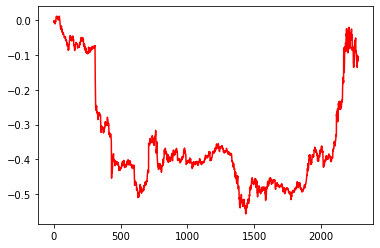

In [89]:
plt.plot(buynhold, color='red')

Стратегия Buy and hold теперь показывает отрицательный результат, проявив свою неустойчивость 

# Стратегия AMA за 25.03.2019-25.03.2020

Рассмотрим модификацию SMA -> AMA.
Торговая стратегия Adjustable Moving Average (AMA) динамически приспосабливается к меняющимся условиям  текущего рынка, основываясь на коэффициенте для определения длинны скользящей средней в разные моменты времени как отношение долгосрочного и краткосрочного стандартного отклонения. 

ma_period = lsd/ssd (long term standard deviation/short term standard deviation)

Расчет long term standard deviation и short term standard deviation

In [90]:
# Расчитываем long term standard deviation за 1 год
df1=pd.read_csv("GAZP.txt", sep=',')  
LR=df1[-2500:]
lsd=np.std(LR['<CLOSE>'])

# Расчитываем short term standard deviation за 1 день

SR=df1[-10:]
ssd=np.std(SR['<CLOSE>'])

ma_period = round(lsd/ssd)
ma_period

16

Расчет SMA, в котором период усреднения равен отношению lsd и ssd

In [91]:
#Расчет простого скользящего среднего
df1['<SMA>']= df1['<CLOSE>'].rolling(window=ma_period).mean()
#Так как сделки совершаются по ценам открытия след периода
df1['<RETURN>'] = df1['<OPEN>']/ (df1['<CLOSE>'].shift(-1))-1
#Если сделка в след периоде, то доходность такая
df1['<RETURN_1>'] = df1['<OPEN>'] /(df1['<CLOSE>'].shift(-2))-1
df1['<RETURN_2>']=df1['<CLOSE>']/df1['<CLOSE>'].shift(-1)-1
# EPS за 2018 65.89 г. (последние доступные данные)
EPS = 65.89
df1['<pe>'] = df1['<CLOSE>']/EPS
df1.head(20)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<SMA>,<RETURN>,<RETURN_1>,<RETURN_2>,<pe>
0,GAZP,60,20190325,100000,151.22,151.67,150.72,151.17,3648090,NaN,-0.002309,-0.002112,-0.002639,2.294278
1,GAZP,60,20190325,110000,151.17,151.85,151.10,151.57,2408670,NaN,-0.002442,-0.004281,0.000198,2.300349
2,GAZP,60,20190325,120000,151.60,152.06,151.37,151.54,3582890,NaN,-0.001449,0.001123,-0.001844,2.299894
3,GAZP,60,20190325,130000,151.55,152.10,151.50,151.82,1343490,NaN,0.000792,-0.000791,0.002575,2.304143
4,GAZP,60,20190325,140000,151.83,151.88,151.41,151.43,1139580,NaN,0.001055,0.002641,-0.001582,2.298224
5,GAZP,60,20190325,150000,151.42,151.78,151.37,151.67,1157500,NaN,-0.000066,-0.002372,0.001585,2.301867
6,GAZP,60,20190325,160000,151.66,152.05,151.30,151.43,2324210,NaN,-0.000791,-0.004137,-0.002306,2.298224
7,GAZP,60,20190325,170000,151.39,152.01,151.39,151.78,2507280,NaN,-0.005910,-0.001846,-0.003349,2.303536
8,GAZP,60,20190325,180000,151.78,152.29,151.62,152.29,4378260,NaN,0.000725,-0.000395,0.004088,2.311276
9,GAZP,60,20190326,100000,151.99,152.34,151.37,151.67,1777320,NaN,0.000988,-0.004454,-0.001120,2.301867


In [92]:
#Перевод значений в строковые величины для упрощения расчетов и расчет длины вектора
close=df1['<CLOSE>'].values
opend=df1['<OPEN>'].values
sma = df1['<SMA>'].values
returns=df1['<RETURN>'].values
return_1=df1['<RETURN_1>'].values
return_2=df1['<RETURN_2>'].values
pe =df1['<pe>'].values
print(len(sma))

2277


Сигнал на продажу

In [93]:
# Сигнал на продажу для расчета доходности по статье
sale_sma = []
for i in range(0, len(sma)):
    if sma[i] < close[i] and sma[i - 1]>=close[i - 1]:
        if close[i]<= opend[i+1]:
            sale_sma.append(returns[i])
        else:
            sale_sma.append(return_1[i])

Сигнал на покупку

In [94]:
#Сигнал на покупку для расчета по формуле из статьи
cost_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1] and pe[i]<4.6:
        cost_sma.append(-returns[i])

In [95]:
#Общая стратегия, по которой будем рассчитывать накопленную доходность
profit_sma = []
for i in range(0, len(sma)):
    if sma[i] > close[i] and sma[i - 1]<=close[i - 1] and pe[i]<4.6:
        profit_sma.append(-returns[i])
    elif (sma[i] < close[i] and sma[i - 1]>=close[i - 1]):
            if close[i]<= opend[i+1]:
                profit_sma.append(returns[i])
            else:
                profit_sma.append(return_1[i])
#print(profit_sma)
#print(len(profit_sma))

Расчет доходности стратегии, %

In [96]:
#Расчет доходности стратегии, %
profitability =(sum(cost_sma)-sum(sale_sma))/sum(cost_sma)
profitability*100

-45.63386002608569

Данная стратегия показала самую низкую доходность, и не может быть использвана в рамках данного актива

Основное внимание должно быть уделено наиболее устойчивой стратегии STOCH-D. SMA может быть использована для подтверждения входа в позицию, или когда на рынке не существенная волатильность, и намечается длинный тренд. Так как Российский рынок достаточно волатильный, то необходимо сгладить стратеию фундаментальным анализом, так как несмотря на консерватиность доходность при его исрользовании привышает таргет.